In [ ]:
! pip install numpy
! pip install pandas 
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('healthcare_noshows.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,True,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [43]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [44]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'].head(10)

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
5   2016-04-27
6   2016-04-27
7   2016-04-27
8   2016-04-29
9   2016-04-27
Name: ScheduledDay, dtype: datetime64[ns]

In [45]:
invalid_dates=df[df['ScheduledDay']>df['AppointmentDay']]
invalid_dates[['ScheduledDay','AppointmentDay']].head(10)

,ScheduledDay,AppointmentDay
26222,2016-05-10,2016-05-09
53324,2016-05-18,2016-05-17
62055,2016-05-05,2016-05-04
69225,2016-05-11,2016-05-05
70039,2016-05-04,2016-05-03


In [46]:
df = df[df['ScheduledDay'] <= df['AppointmentDay']].copy()


In [47]:
print('max_age:',df['Age'].max())
print('min_age:',df['Age'].min())

max_age: 115
min_age: 1


In [48]:
df = df[(df['Age'] > 0) & (df['Age'] <= 100)]


In [49]:
print('max_age:',df['Age'].max())
print('min_age:',df['Age'].min())

max_age: 100
min_age: 1


In [50]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [51]:
df=df.drop(['AppointmentID','PatientId'],axis=1)

In [52]:
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
5,0,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2
6,0,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2
7,0,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2
8,0,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,True,0
9,0,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2


In [55]:
print(df['Date.diff'].max())

179


In [62]:
scalar = StandardScaler()
df[['Age','Date.diff']]= scalar.fit_transform(df[['Age','Date.diff']])

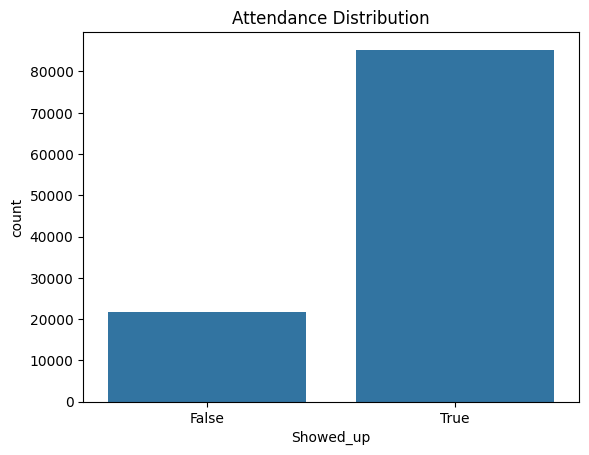

In [65]:
sns.countplot(x='Showed_up',data=df)
plt.title('Attendance Distribution')
plt.show()

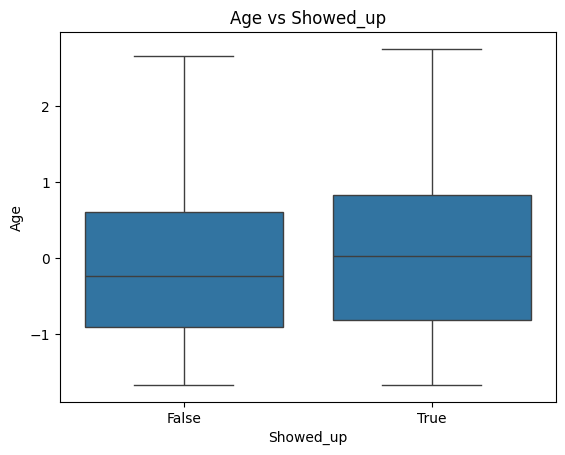

In [66]:
sns.boxplot(x='Showed_up',y='Age',data=df)
plt.title('Age vs Showed_up')
plt.show()

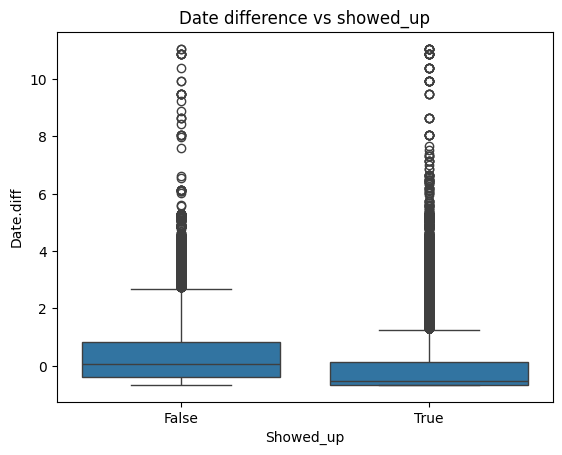

In [67]:
sns.boxplot(x='Showed_up',y='Date.diff',data=df)
plt.title('Date difference vs showed_up')
plt.show()

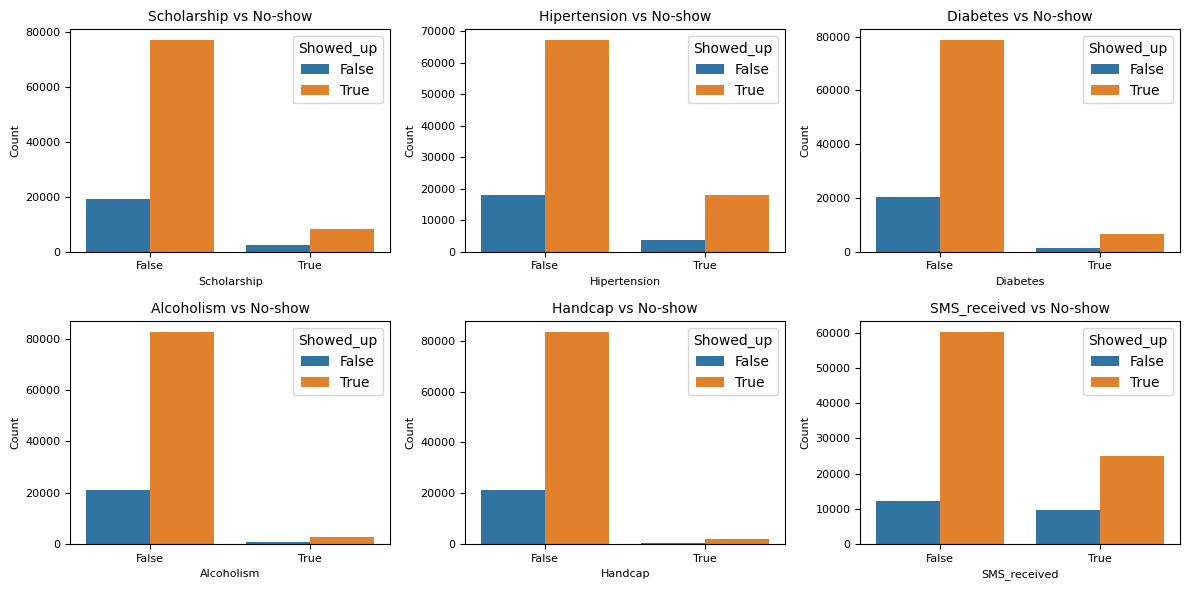

In [ ]:
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols


plt.figure(figsize=(4 * n_cols, 3 * n_rows))  
for idx, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.countplot(x=col, hue='Showed_up', data=df)
    plt.title(f'{col} vs No-show', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [70]:
df.to_csv('cleaned_healthcare_data.csv', index=False)
